In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [44]:
df = pd.read_csv("/content/heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [45]:
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values


,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [46]:

d_types = df.dtypes
d_types


,0
HeartDiseaseorAttack,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
Diabetes,float64
PhysActivity,float64
Fruits,float64


In [47]:
#Check duplicate rows
duplicate_c = df.duplicated().sum()
duplicate_c

np.int64(23899)

In [48]:
# Assuming your target column is 'HeartDiseaseorAttack' for this heart disease dataset
feature_names = df.drop("HeartDiseaseorAttack", axis=1).columns.tolist()
print(feature_names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [49]:
# Split features and target for heart disease dataset
X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]

In [50]:
X,y

(        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  \
 0          1.0       1.0        1.0  40.0     1.0     0.0       0.0   
 1          0.0       0.0        0.0  25.0     1.0     0.0       0.0   
 2          1.0       1.0        1.0  28.0     0.0     0.0       0.0   
 3          1.0       0.0        1.0  27.0     0.0     0.0       0.0   
 4          1.0       1.0        1.0  24.0     0.0     0.0       0.0   
 ...        ...       ...        ...   ...     ...     ...       ...   
 253675     1.0       1.0        1.0  45.0     0.0     0.0       0.0   
 253676     1.0       1.0        1.0  18.0     0.0     0.0       2.0   
 253677     0.0       0.0        1.0  28.0     0.0     0.0       0.0   
 253678     1.0       0.0        1.0  23.0     0.0     0.0       0.0   
 253679     1.0       1.0        1.0  25.0     0.0     0.0       2.0   
 
         PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  \
 0                0.0     0.0      1.0  ...            1.0 

In [51]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [52]:
y.head()

,HeartDiseaseorAttack
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [54]:
# Remove duplicates considering all columns
df = df.drop_duplicates()

# Or remove duplicates based on specific columns only
# df = df.drop_duplicates(subset=['col1', 'col2'])

X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]

In [55]:
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c

np.int64(0)

In [56]:
y.value_counts(normalize=True)

,proportion
HeartDiseaseorAttack,
0.0,0.896784
1.0,0.103216


In [57]:
#See features have <1% variance
low_variance = (X.nunique() / len(X)) < 0.01
print(X.columns[low_variance])

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


In [58]:
import seaborn as sns

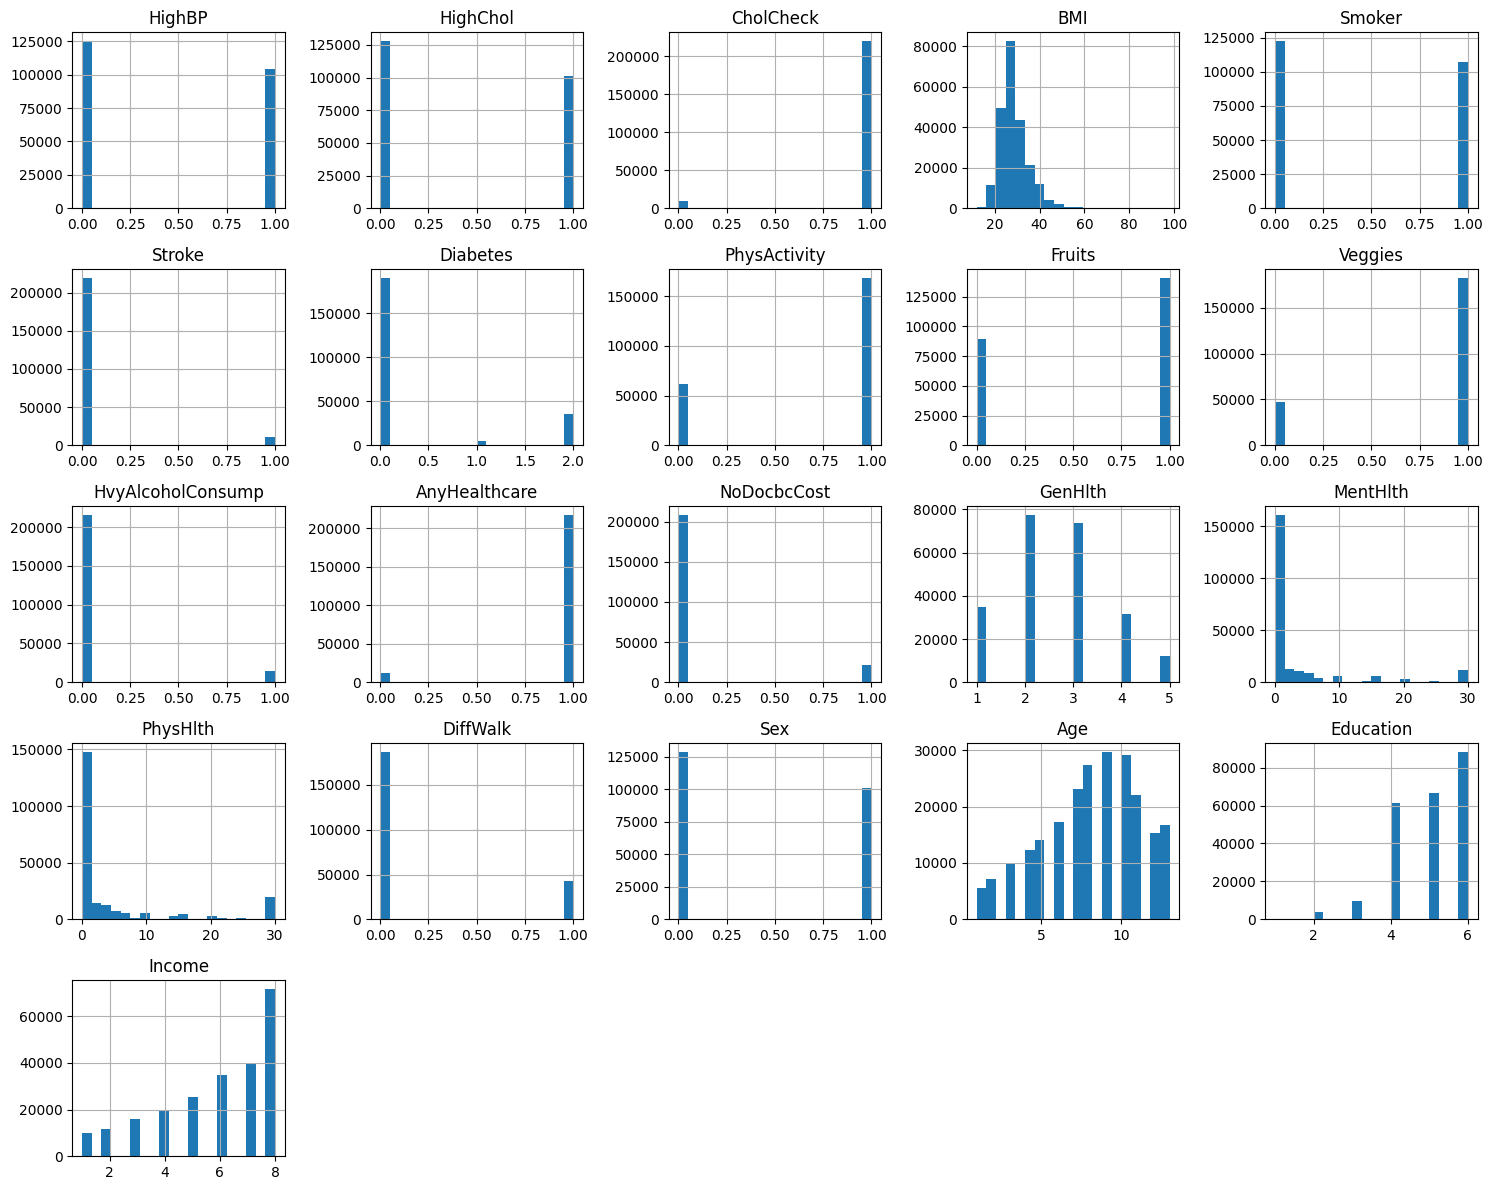

In [59]:
#histograms
X.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()


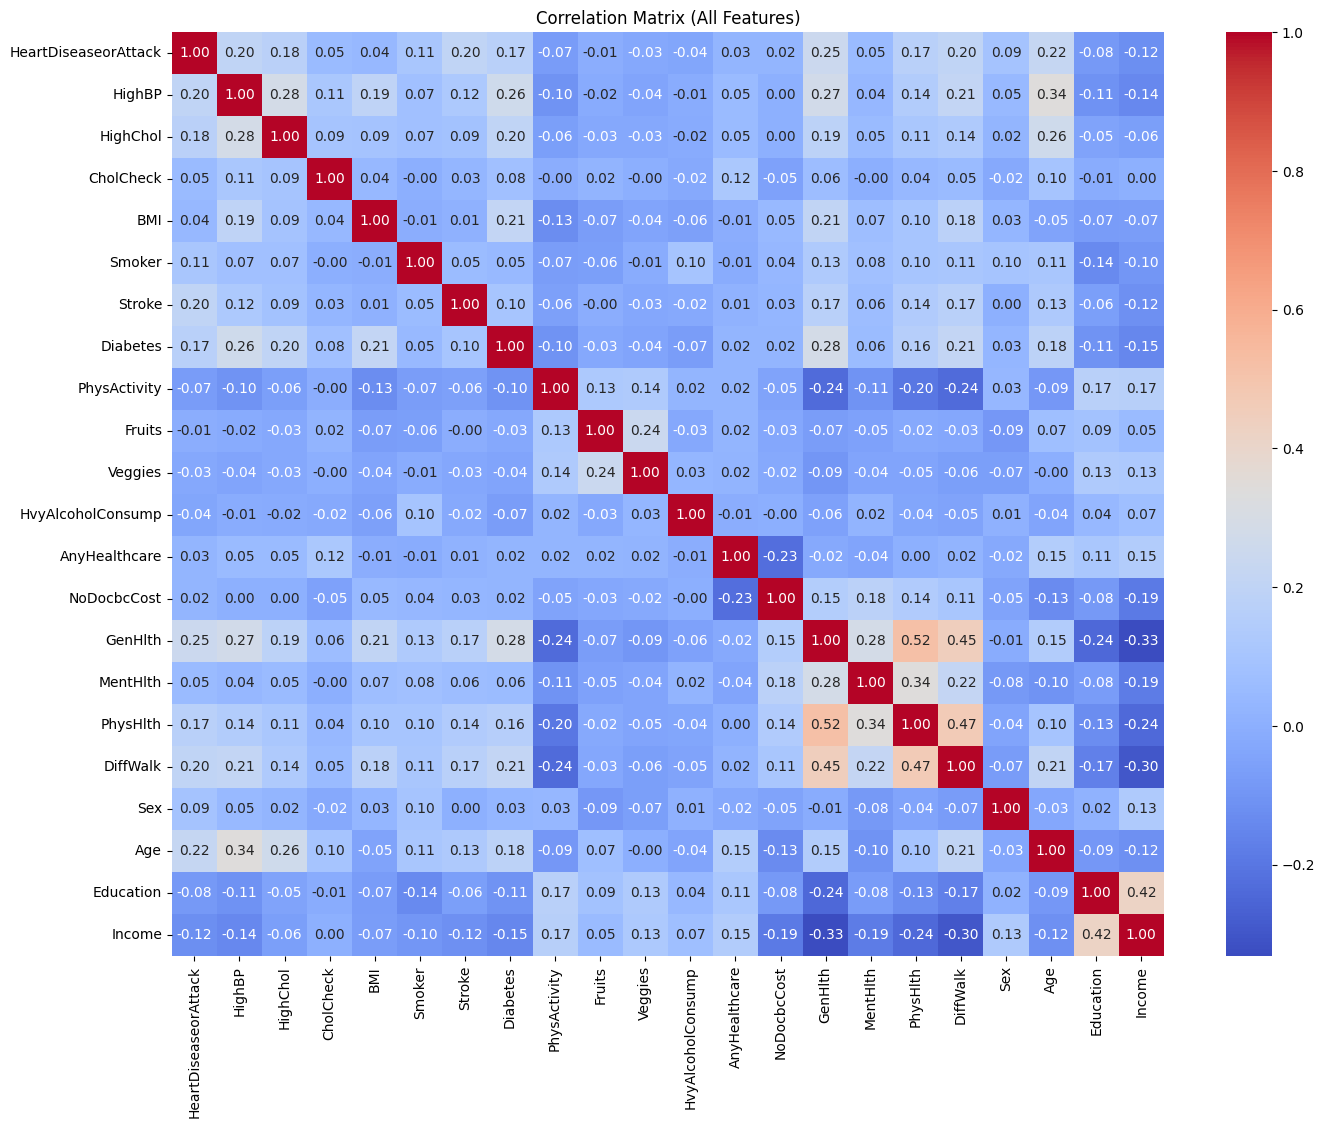

In [60]:
#Correlation Matrix(all features)
plt.figure(figsize=(16, 12))
c_matrix = df.corr(numeric_only=True)
sns.heatmap(c_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Features)")
plt.show()

In [61]:
# Calculate correlation matrix
c_matrix = df.corr()

# Correlation with Target (HeartDiseaseorAttack)
t_cor = c_matrix["HeartDiseaseorAttack"].drop("HeartDiseaseorAttack").sort_values(ascending=False)

print("Correlation with HeartDiseaseorAttack:\n")
print(t_cor)

Correlation with HeartDiseaseorAttack:

GenHlth              0.246411
Age                  0.223626
DiffWalk             0.202779
HighBP               0.201271
Stroke               0.198863
HighChol             0.176279
Diabetes             0.170816
PhysHlth             0.170473
Smoker               0.105154
Sex                  0.089717
MentHlth             0.052756
CholCheck            0.049995
BMI                  0.039926
AnyHealthcare        0.025899
NoDocbcCost          0.022076
Fruits              -0.007128
Veggies             -0.027330
HvyAlcoholConsump   -0.035453
PhysActivity        -0.073267
Education           -0.082466
Income              -0.122908
Name: HeartDiseaseorAttack, dtype: float64


In [62]:
# Calculate correlation matrix
c_matrix = df.corr()

# Get absolute correlation with HeartDiseaseorAttack and sort
corr_abs = c_matrix["HeartDiseaseorAttack"].drop("HeartDiseaseorAttack").abs().sort_values(ascending=False)

# Top correlated features by absolute value
print("Top Features by Absolute Correlation with HeartDiseaseorAttack:\n")
print(corr_abs)

Top Features by Absolute Correlation with HeartDiseaseorAttack:

GenHlth              0.246411
Age                  0.223626
DiffWalk             0.202779
HighBP               0.201271
Stroke               0.198863
HighChol             0.176279
Diabetes             0.170816
PhysHlth             0.170473
Income               0.122908
Smoker               0.105154
Sex                  0.089717
Education            0.082466
PhysActivity         0.073267
MentHlth             0.052756
CholCheck            0.049995
BMI                  0.039926
HvyAlcoholConsump    0.035453
Veggies              0.027330
AnyHealthcare        0.025899
NoDocbcCost          0.022076
Fruits               0.007128
Name: HeartDiseaseorAttack, dtype: float64


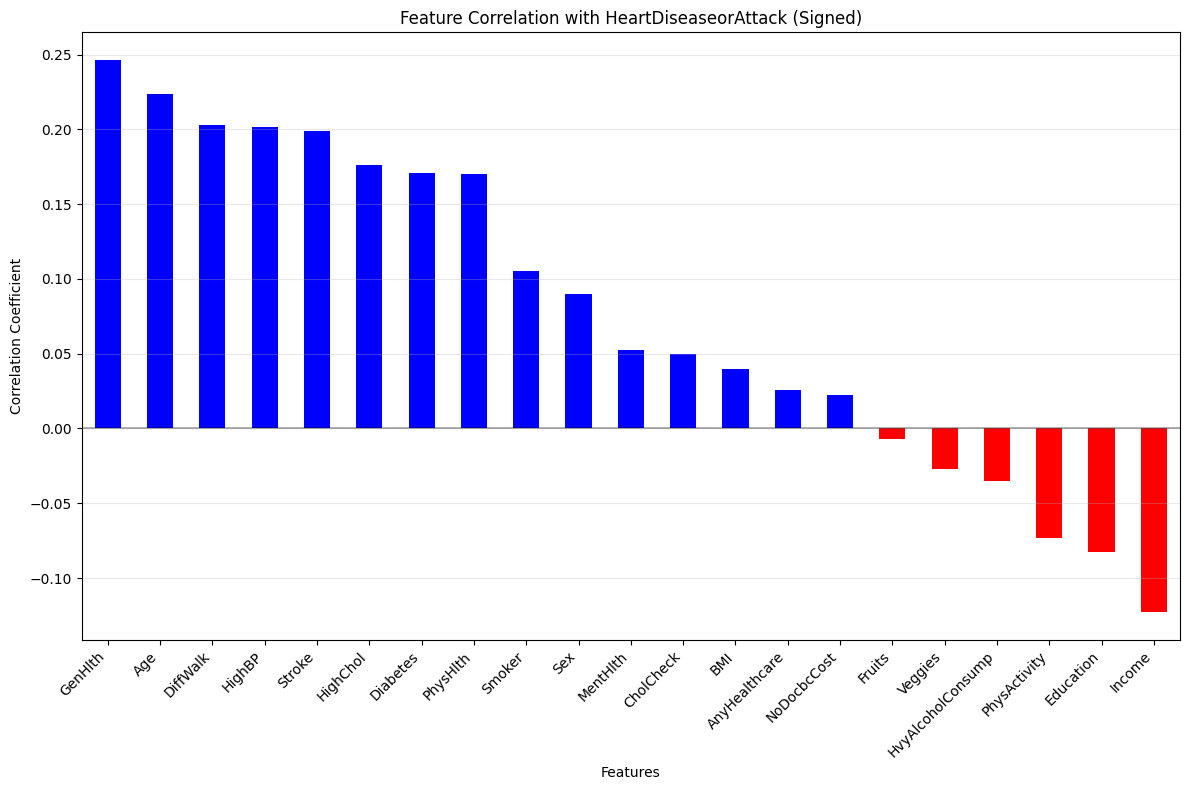

In [63]:
# Calculate correlation matrix
c_matrix = df.corr()

# Get signed correlation with HeartDiseaseorAttack
t_cor = c_matrix["HeartDiseaseorAttack"].drop("HeartDiseaseorAttack").sort_values(ascending=False)

# Visualize correlations with target (signed)
plt.figure(figsize=(12, 8))
t_cor.plot(kind='bar', color=['red' if x < 0 else 'blue' for x in t_cor])
plt.title("Feature Correlation with HeartDiseaseorAttack (Signed)")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3411263894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')


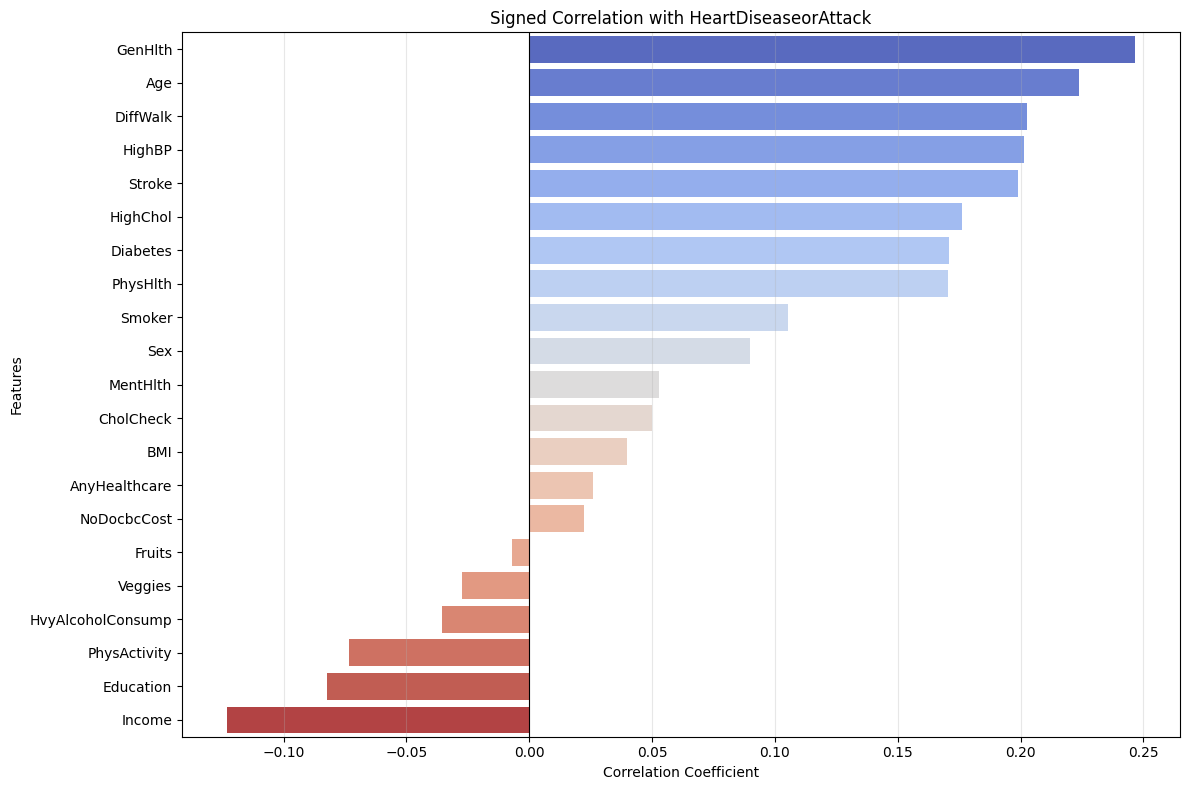

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')
plt.title("Signed Correlation with HeartDiseaseorAttack")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True, axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

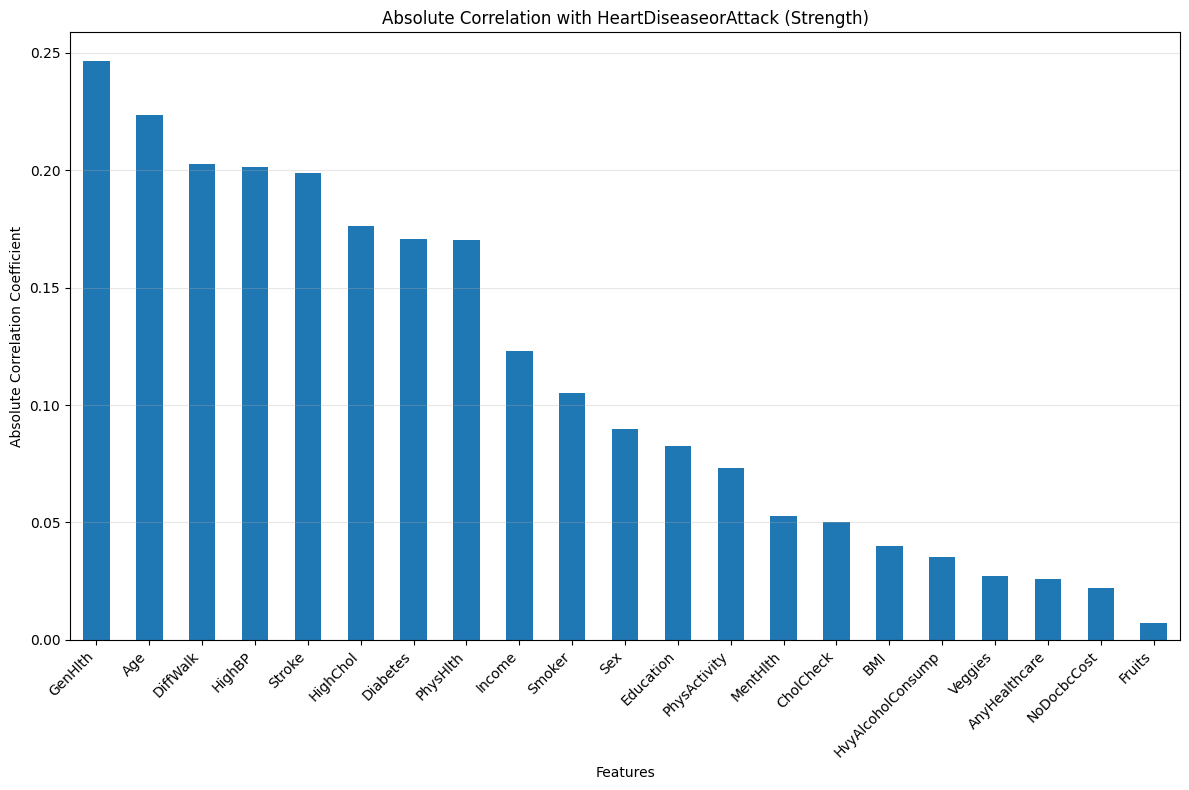

In [65]:
# Visual absolute correlations
plt.figure(figsize=(12, 8))
corr_abs.plot(kind='bar')
plt.title("Absolute Correlation with HeartDiseaseorAttack (Strength)")
plt.ylabel("Absolute Correlation Coefficient")
plt.xlabel("Features")
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3871605101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')


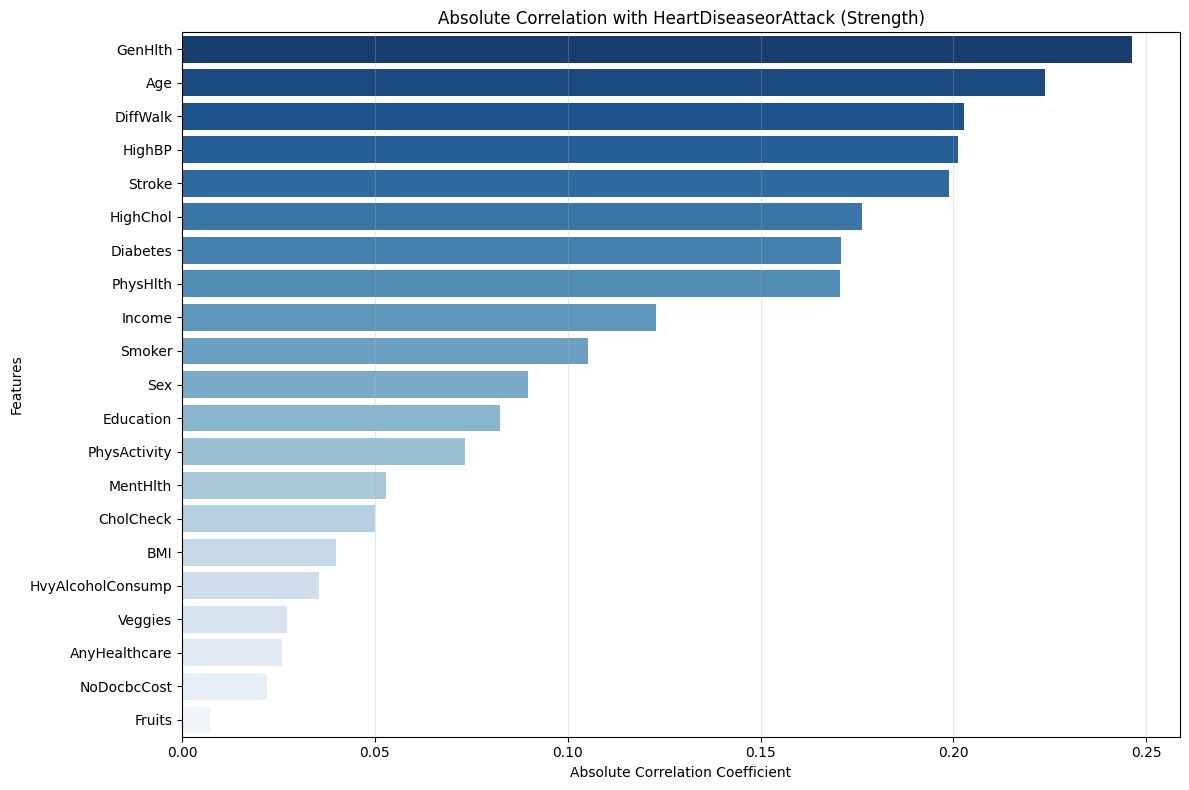

In [66]:
# Visual absolute correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')
plt.title("Absolute Correlation with HeartDiseaseorAttack (Strength)")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [67]:
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # i+1 because of const
print(vif_data.sort_values("VIF", ascending=False))

              Feature       VIF
13            GenHlth  1.726407
15           PhysHlth  1.593849
16           DiffWalk  1.509865
20             Income  1.432098
18                Age  1.342605
0              HighBP  1.312147
19          Education  1.272606
14           MentHlth  1.221934
6            Diabetes  1.192851
1            HighChol  1.162202
3                 BMI  1.142953
12        NoDocbcCost  1.135745
7        PhysActivity  1.130756
11      AnyHealthcare  1.110003
9             Veggies  1.098272
8              Fruits  1.098087
4              Smoker  1.074370
17                Sex  1.066139
5              Stroke  1.059361
2           CholCheck  1.035979
10  HvyAlcoholConsump  1.027511


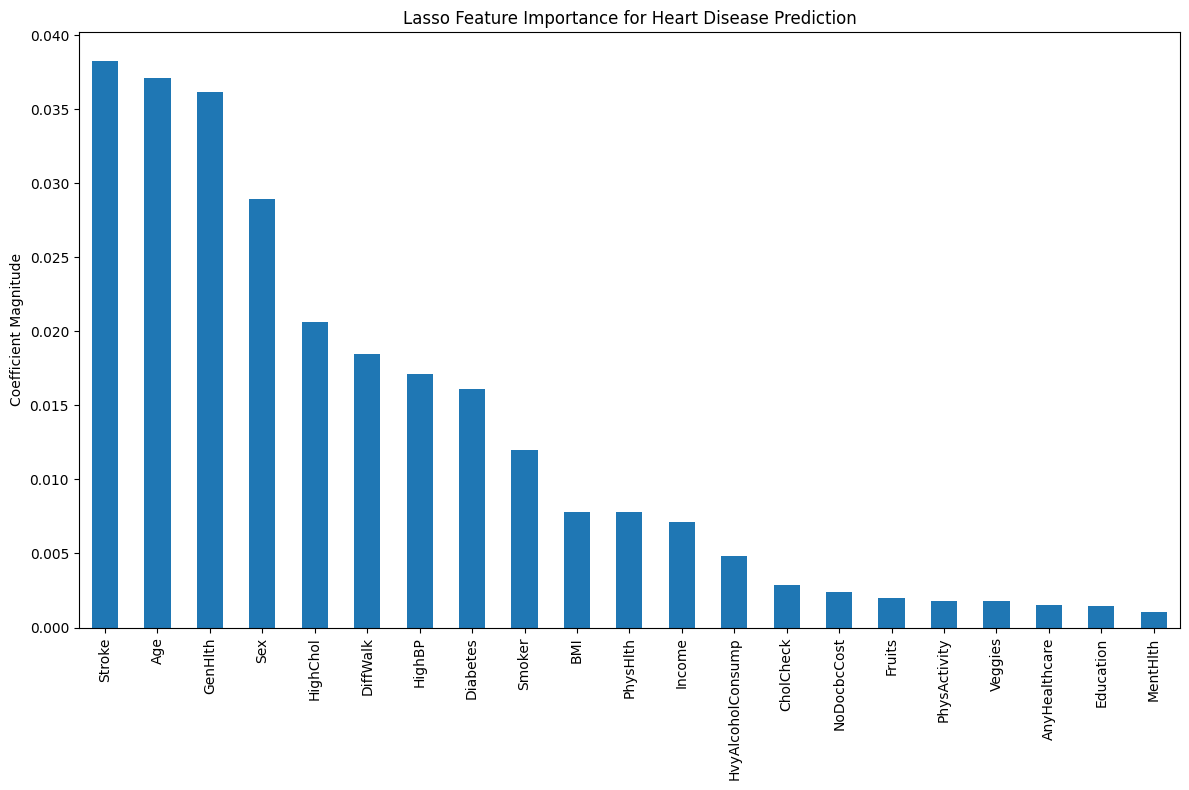

In [68]:
# Feature Importance Using Lasso Regression (Selection)
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,8), title="Lasso Feature Importance for Heart Disease Prediction")
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

In [69]:
# Recursive Feature Elimination (RFE) with Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top 10 Features from RFE:", selected_features.tolist())

Top 10 Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'DiffWalk', 'Sex', 'Age']


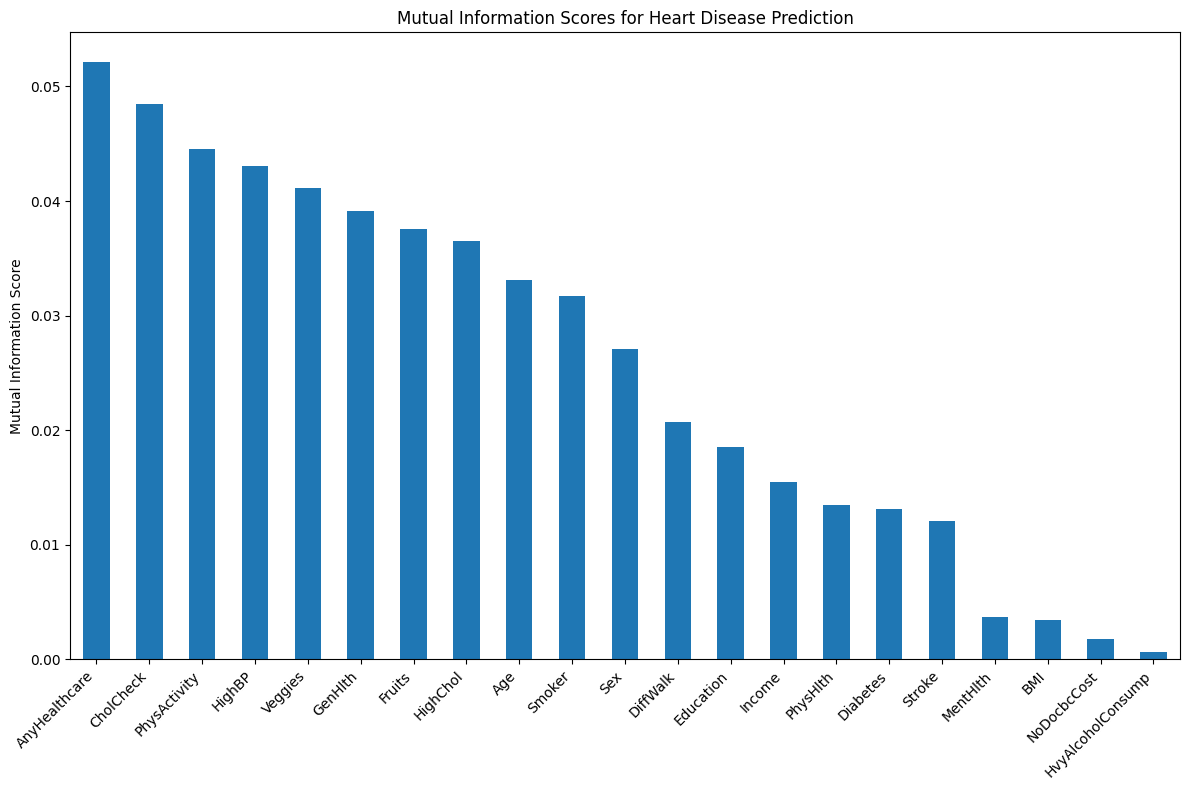

In [70]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(12, 8), title='Mutual Information Scores for Heart Disease Prediction')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Convert RFE feature list into ranking
rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)

# Normalize Lasso & MI into Rankings
lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')

# Combine All Rankings into One DataFrame
feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

# Fill missing RFE ranks with worst rank (total number of features + 1)
feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

# Compute Average Ranking
feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

# Sort by Average Ranking
combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))


Combined Feature Rankings:
                   LassoRank  MIRank  RFERank  AverageRank
Age                      2.0     9.0      1.0         4.00
GenHlth                  3.0     6.0      4.0         4.33
Sex                      4.0    11.0      2.0         5.67
HighBP                   7.0     4.0     10.0         7.00
DiffWalk                 6.0    12.0      3.0         7.00
HighChol                 5.0     8.0      9.0         7.33
Stroke                   1.0    17.0      6.0         8.00
CholCheck               14.0     2.0      8.0         8.00
Smoker                   9.0    10.0      7.0         8.67
Diabetes                 8.0    16.0      5.0         9.67
AnyHealthcare           19.0     1.0     22.0        14.00
PhysActivity            17.0     3.0     22.0        14.00
Fruits                  16.0     7.0     22.0        15.00
Veggies                 18.0     5.0     22.0        15.00
Income                  12.0    14.0     22.0        16.00
PhysHlth                11.0

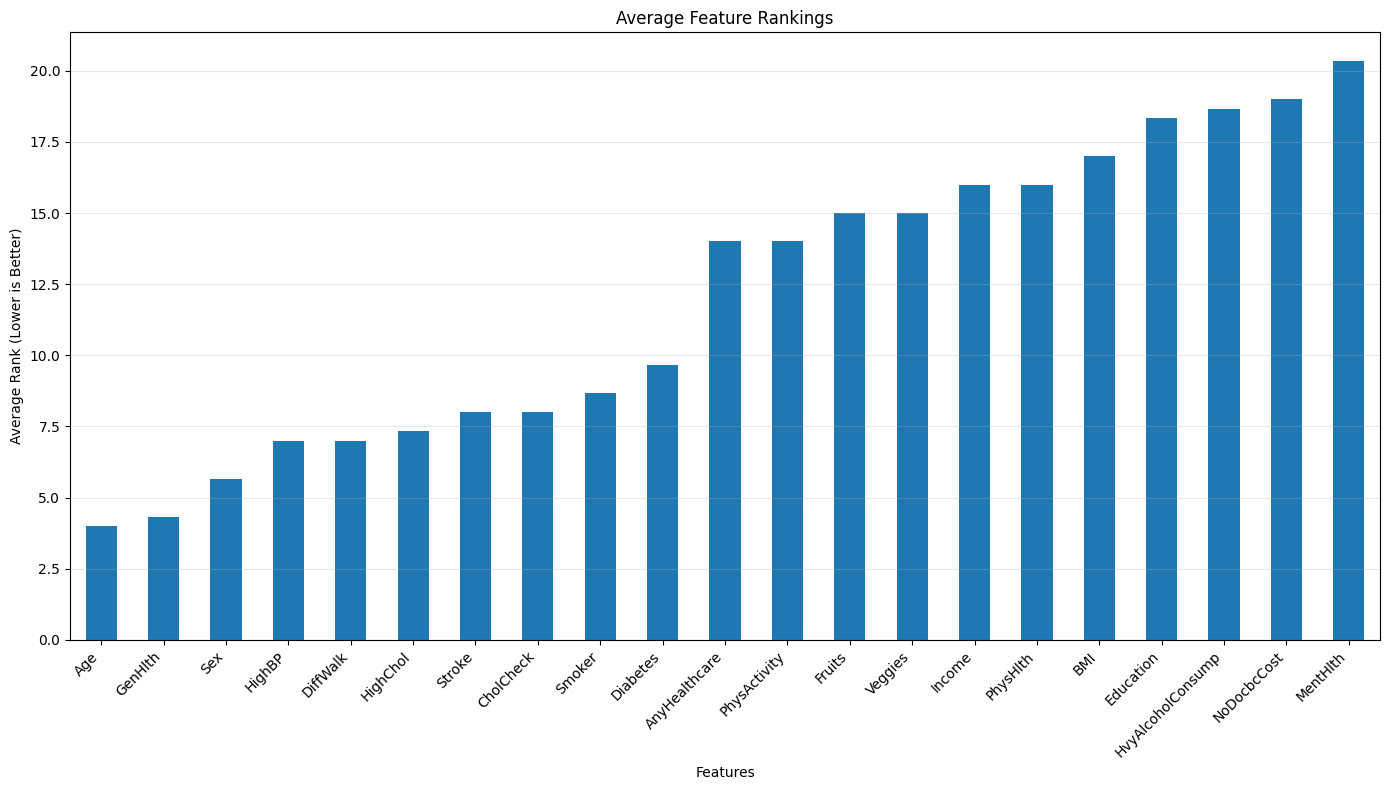

In [72]:
# Bar plot of average ranks
combined_rank['AverageRank'].plot(kind='bar', figsize=(14, 8), title='Average Feature Rankings')
plt.ylabel('Average Rank (Lower is Better)')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

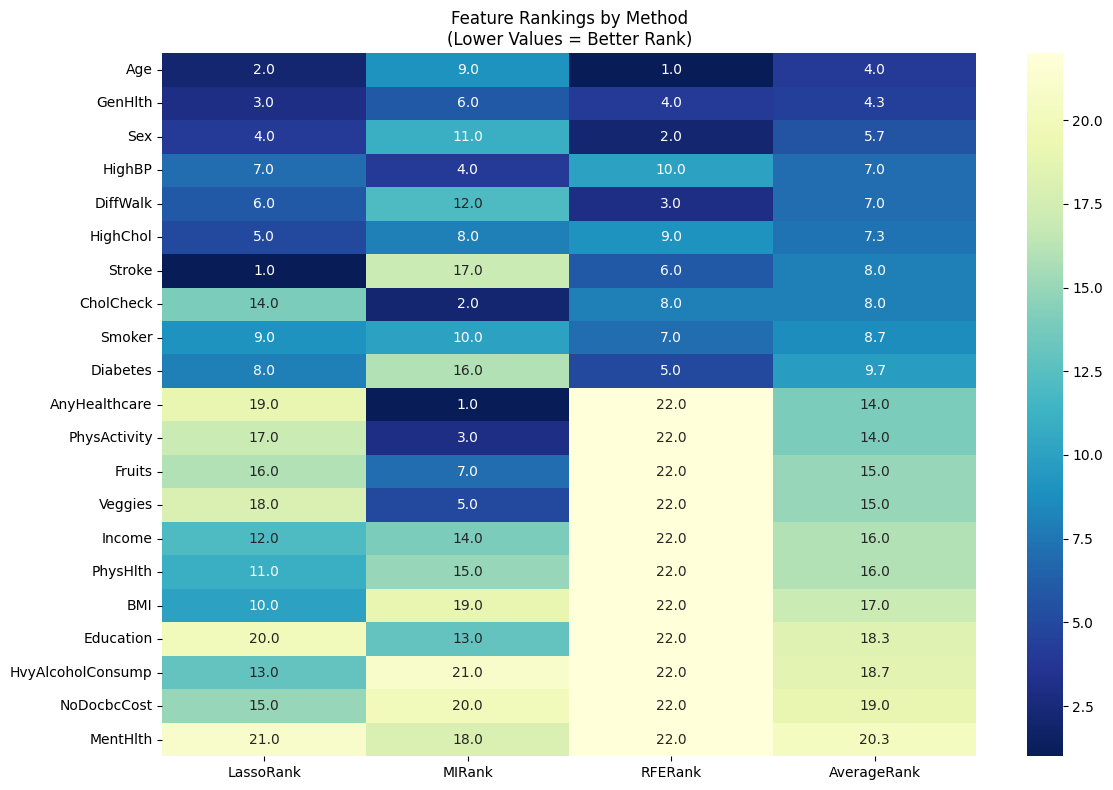

In [73]:
ordered_df = combined_rank.sort_values('AverageRank')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_df[['LassoRank', 'MIRank', 'RFERank', 'AverageRank']],
            annot=True, cmap='YlGnBu_r', fmt=".1f")  # _r for reversed colormap
plt.title("Feature Rankings by Method\n(Lower Values = Better Rank)")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [74]:
# Manually drop low impacted features
top_features = combined_rank.head(18).index.tolist()
X_selected = X[top_features]
X_selected

,Age,GenHlth,Sex,HighBP,DiffWalk,HighChol,Stroke,CholCheck,Smoker,Diabetes,AnyHealthcare,PhysActivity,Fruits,Veggies,Income,PhysHlth,BMI,Education
0,9.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,15.0,40.0,4.0
1,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,6.0
2,9.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,30.0,28.0,4.0
3,11.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,6.0,0.0,27.0,3.0
4,11.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,0.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,5.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,7.0,5.0,45.0,6.0
253676,11.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,18.0,2.0
253677,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,28.0,5.0
253678,7.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,23.0,5.0


In [75]:
print(top_features)

['Age', 'GenHlth', 'Sex', 'HighBP', 'DiffWalk', 'HighChol', 'Stroke', 'CholCheck', 'Smoker', 'Diabetes', 'AnyHealthcare', 'PhysActivity', 'Fruits', 'Veggies', 'Income', 'PhysHlth', 'BMI', 'Education']


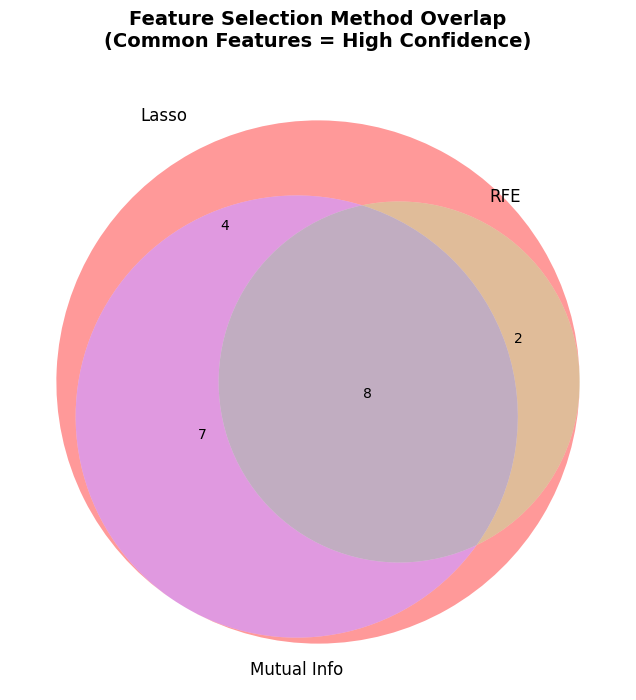

In [76]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Get feature sets from each method
lasso_features = set(feature_importance[feature_importance > 0].index.tolist())  # Lasso non-zero features
rfe_features = set(selected_features.tolist())                                   # RFE selected features
mi_top_n = 15  # Adjust based on your preference
mi_features = set(mi_series.head(mi_top_n).index.tolist())                       # Top MI features

# Create Venn diagram
plt.figure(figsize=(10, 8))
venn = venn3(
    [lasso_features, rfe_features, mi_features],
    set_labels=('Lasso', 'RFE', 'Mutual Info')
)

plt.title("Feature Selection Method Overlap\n(Common Features = High Confidence)",
          fontsize=14, fontweight='bold', pad=20)
plt.show()

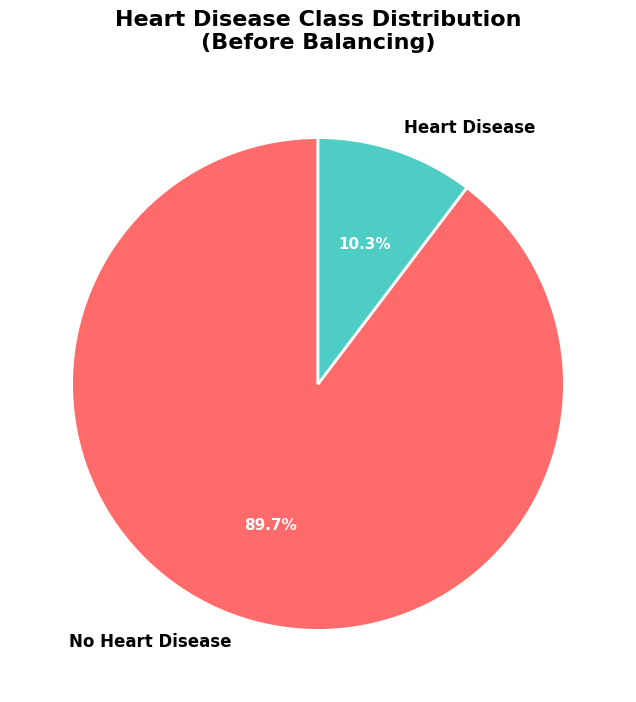

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Class counts
counts = y.value_counts()

# Cute & vibrant color combination
colors = ['#FF6B6B', '#4ECDC4']  # Coral red and turquoise
class_labels = ['No Heart Disease', 'Heart Disease']  # More descriptive labels

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(counts, labels=class_labels, autopct='%1.1f%%', colors=colors,
        startangle=90, wedgeprops={'edgecolor':'white', 'linewidth':2},
        textprops={'fontsize': 12, 'fontweight': 'bold'})

# Enhance the autopct text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.title("Heart Disease Class Distribution\n(Before Balancing)",
          fontsize=16, fontweight='bold', pad=20)
plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [78]:
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())


Original class distribution:
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64


In [79]:
#start step3 from here, with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [80]:
#for x_selected
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
#X_resampled, y_resampled = smote.fit_resample(X, y)

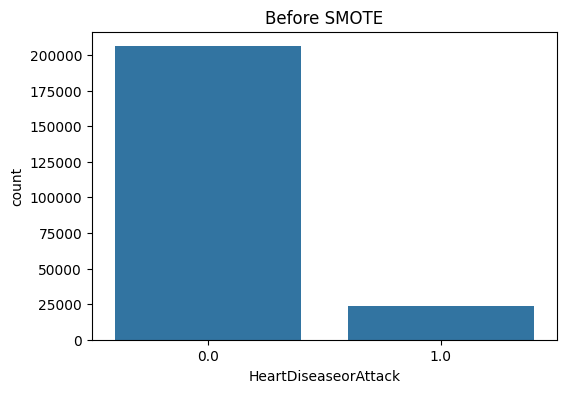

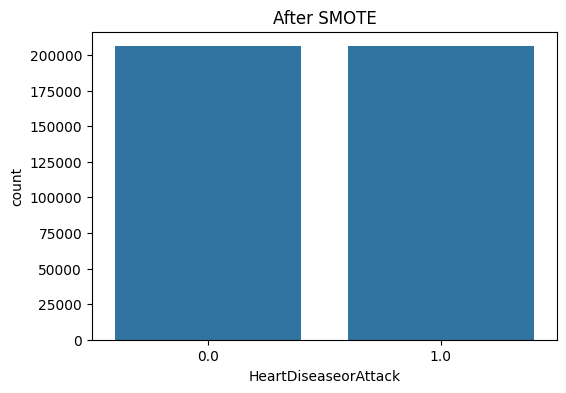

In [81]:
# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.show()

In [82]:
print(y_resampled.value_counts(normalize=True))

HeartDiseaseorAttack
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [83]:
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)

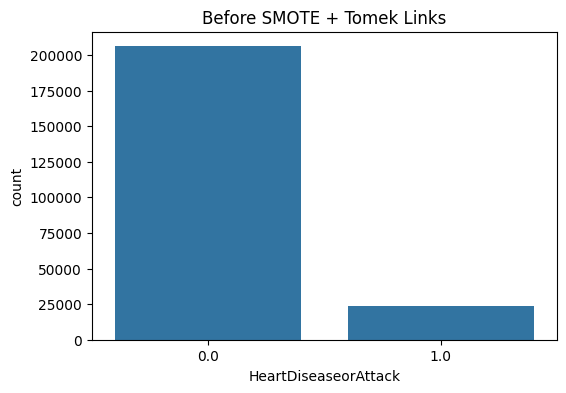

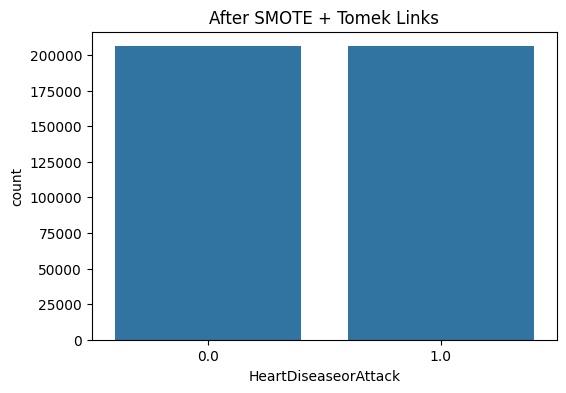

In [84]:
# Before SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE + Tomek Links")
plt.show()

# After SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE + Tomek Links")
plt.show()

In [85]:
# Use SMOTE + Tomek Links balanced data
X_final = X_bal
y_final = y_bal

In [86]:
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

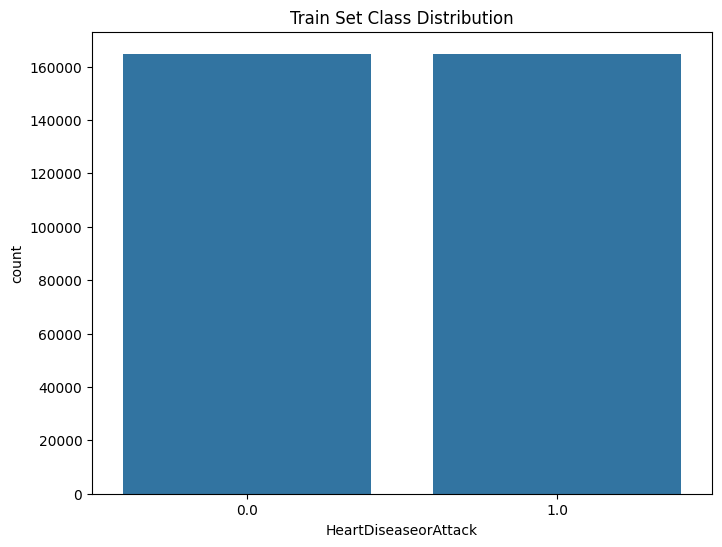

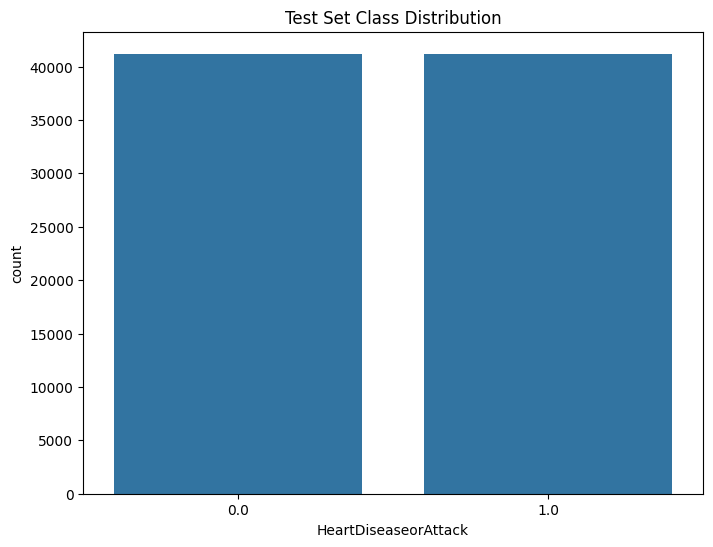

In [87]:
# Training set distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title("Train Set Class Distribution")
plt.show()

# Testing set distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.show()

In [88]:
print("Train set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

Train set:
 HeartDiseaseorAttack
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

Test set:
 HeartDiseaseorAttack
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [89]:
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())

Train set count:
 HeartDiseaseorAttack
1.0    164804
0.0    164804
Name: count, dtype: int64

Test set count:
 HeartDiseaseorAttack
1.0    41201
0.0    41201
Name: count, dtype: int64


model train

In [90]:
#1st Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

#model training
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

#Prediction
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] #Only probabilities for class 1
#we can use it Plot ROC curve, AUC score and Apply custom threshold instead of default 0.5 for classification

#Evaluation metrics
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Logistic Regression Evaluation:
Accuracy: 0.7690954103055752
Precision: 0.7542773267281317
Recall: 0.7982330525958108
F1 Score: 0.7756329375140031
ROC AUC Score: 0.8445712319645554


In [91]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.76     41201
         1.0       0.75      0.80      0.78     41201

    accuracy                           0.77     82402
   macro avg       0.77      0.77      0.77     82402
weighted avg       0.77      0.77      0.77     82402



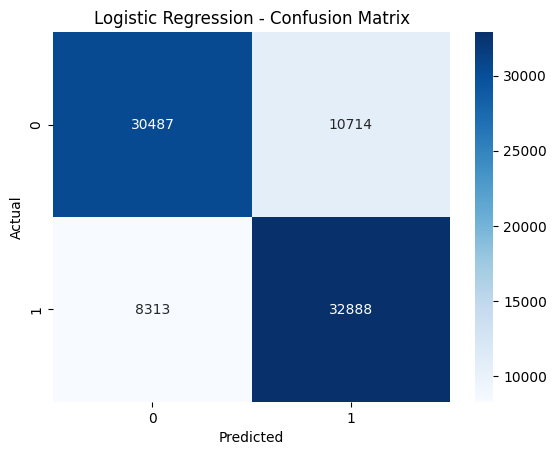

In [92]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


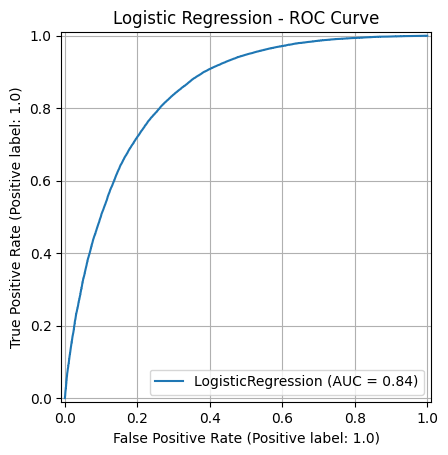

In [93]:
#ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.grid(True)
plt.show()

In [94]:
#2nd modeluse linear SVM Model instead of SVM model(as datasets is large)

from sklearn.svm import LinearSVC

svm_linear = LinearSVC(max_iter=10000, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)



In [95]:
#No probability output in LinearSVC, so ROC AUC won't work directly
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Linear SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))


Linear SVM Evaluation:
Accuracy: 0.7692774447222155
Precision: 0.7505589557126403
Recall: 0.8066309070168199
F1 Score: 0.7775854000935891


Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.73      0.76     41201
         1.0       0.75      0.81      0.78     41201

    accuracy                           0.77     82402
   macro avg       0.77      0.77      0.77     82402
weighted avg       0.77      0.77      0.77     82402



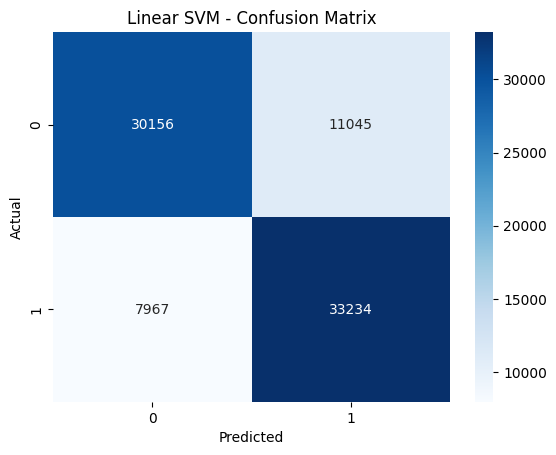

In [96]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Linear SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [97]:
#3rd model XGBOOST Classifier
from xgboost import XGBClassifier

#Traing XGBOOST Classifier model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

#Prediction using XGBOOST Classifier model
y_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:33:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [98]:
print("XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))

XGBoost Evaluation:
Accuracy: 0.9388971141477148
Precision: 0.9849809580003218
Recall: 0.8913861314045776
F1 Score: 0.9358492489202034


Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     41201
         1.0       0.98      0.89      0.94     41201

    accuracy                           0.94     82402
   macro avg       0.94      0.94      0.94     82402
weighted avg       0.94      0.94      0.94     82402



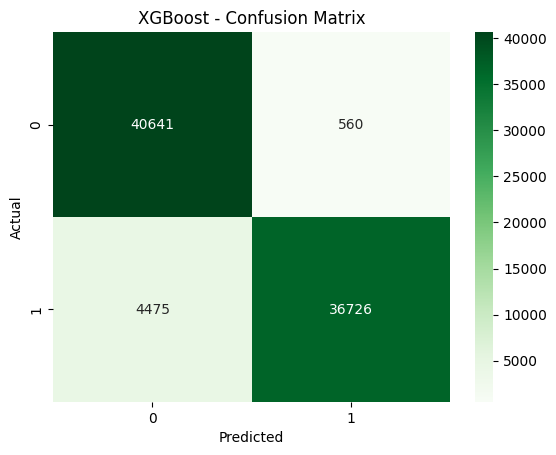

In [99]:
#confussion metrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [100]:

#ANN using TensorFlow

# first we need to install tensorFlow
!pip install tensorflow

In [101]:
#import neccessery metarial for applying ANN using tensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [102]:
#4th ANN architecture Define
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # input layer
ann_model.add(Dropout(0.3))
ann_model.add(Dense(32, activation='relu'))  # hidden layer
ann_model.add(Dropout(0.3))
ann_model.add(Dense(1, activation='sigmoid'))  # output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
#model compiling
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
#model training
ann_history = ann_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7076 - loss: 0.5997 - val_accuracy: 0.7629 - val_loss: 0.5043
Epoch 2/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7645 - loss: 0.5014 - val_accuracy: 0.7782 - val_loss: 0.4740
Epoch 3/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7738 - loss: 0.4854 - val_accuracy: 0.7868 - val_loss: 0.4639
Epoch 4/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7809 - loss: 0.4735 - val_accuracy: 0.7971 - val_loss: 0.4457
Epoch 5/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7840 - loss: 0.4649 - val_accuracy: 0.8031 - val_loss: 0.4322
Epoch 6/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7881 - loss: 0.4583 - val_accuracy: 0.8056 - val_loss: 0.4223
Epoch 7/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7910 - loss: 0.4528 - val_accuracy: 0.8105 - val_loss: 0.4205
Epoch 8/25
8241/8241 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7953 - loss: 0

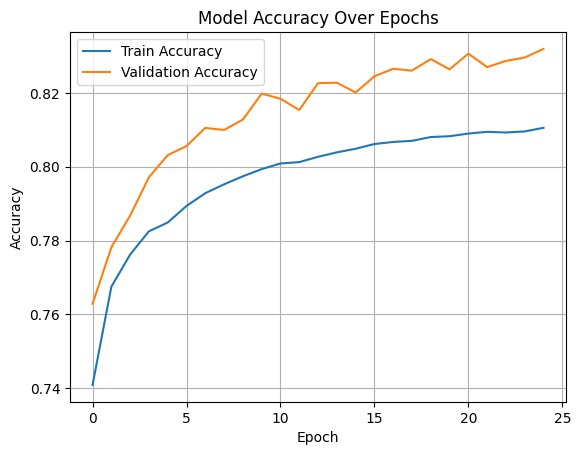

In [105]:
#Accuracy
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

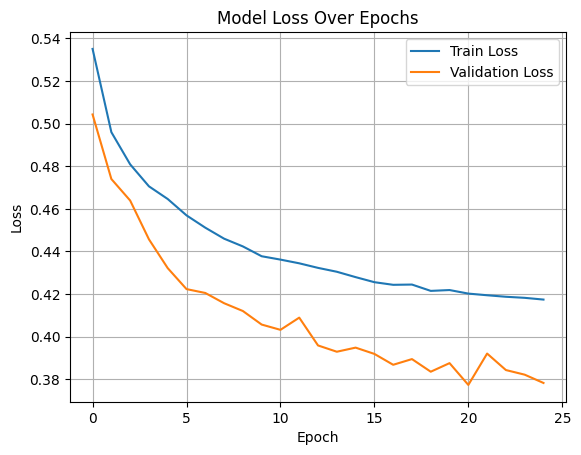

In [106]:
#Loss
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [107]:
#Predictions(rounded to 0 or 1)
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("ANN Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

2576/2576 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
ANN Evaluation:
Accuracy: 0.8290211402635859
Precision: 0.8258340544178444
Recall: 0.8339117982573239
F1 Score: 0.8298532697300888

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.82      0.83     41201
         1.0       0.83      0.83      0.83     41201

    accuracy                           0.83     82402
   macro avg       0.83      0.83      0.83     82402
weighted avg       0.83      0.83      0.83     82402



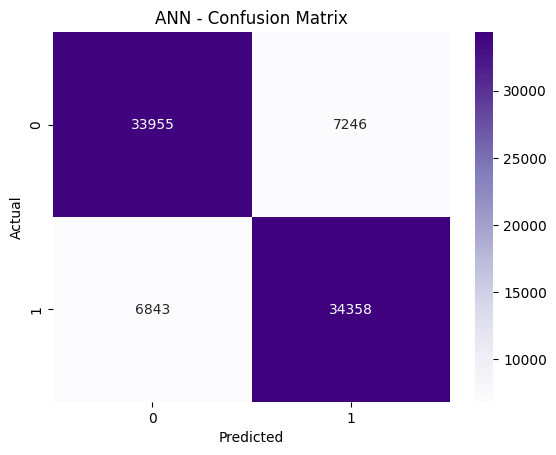

In [108]:
#confusion metrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("ANN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [109]:
from sklearn.ensemble import RandomForestClassifier

#model training and initialization
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Prediction
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [110]:
#Evaluation
print("Random Forest Classifier Results:\n")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))
print("\n\nClassification Report:\n", classification_report(y_test, rf_preds))


Random Forest Classifier Results:

[[40068  1133]
 [ 3782 37419]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     41201
         1.0       0.97      0.91      0.94     41201

    accuracy                           0.94     82402
   macro avg       0.94      0.94      0.94     82402
weighted avg       0.94      0.94      0.94     82402

Accuracy: 0.9403533894808378
ROC-AUC: 0.9805639645871158


Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     41201
         1.0       0.97      0.91      0.94     41201

    accuracy                           0.94     82402
   macro avg       0.94      0.94      0.94     82402
weighted avg       0.94      0.94      0.94     82402



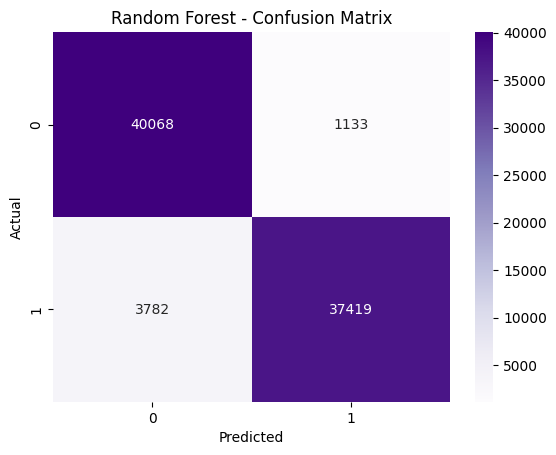

In [111]:
#confusion metrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [112]:
#1st model logistic regression
from sklearn.model_selection import GridSearchCV

#model define
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

#hyperparameter grid define
param_grid = {
    'penalty': ['l1', 'l2'], # L1 = Lasso, L2 = Ridge
    'C': [0.01, 0.1, 1, 10, 100]  # Reguarization strength (lower =to stronger)
}

#GridSearchCV set
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [113]:
#model fiting
grid_search_lr.fit(X_train, y_train)
#best one
best_lr = grid_search_lr.best_estimator_

#Evaluation
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]


print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.7691560884444553
Precision: 0.7538165754960976
Recall: 0.7993738016067571
F1 Score: 0.7759270602648071
ROC-AUC Score: 0.8437516928532126

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.76     41201
         1.0       0.75      0.80      0.78     41201

    accuracy                           0.77     82402
   macro avg       0.77      0.77      0.77     82402
weighted avg       0.77      0.77      0.77     82402



In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svm = LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)

pipeline = make_pipeline(StandardScaler(), svm)

param_grid = {
    'linearsvc__C': [0.01, 0.1, 1, 10, 100],
    'linearsvc__loss': ['hinge', 'squared_hinge']
}

grid_search_svm = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [115]:
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_

y_pred_svm = best_svm.predict(X_test)

print("Best Hyperparameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'linearsvc__C': 100, 'linearsvc__loss': 'hinge'}
Accuracy: 0.7686585277056383
Precision: 0.745617538720987
Recall: 0.8155627290599743
F1 Score: 0.7790232649796562

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     41201
         1.0       0.75      0.82      0.78     41201

    accuracy                           0.77     82402
   macro avg       0.77      0.77      0.77     82402
weighted avg       0.77      0.77      0.77     82402



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [116]:
#3rd model XGBOOST classifier

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


#Create XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
}
#Randomized Search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [117]:
xgb_random_search.fit(X_train, y_train)

best_xgb = xgb_random_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:39:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [118]:
#Evaluation
print("Best Hyperparameters:", xgb_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
Accuracy: 0.9280842697992767
Precision: 0.9587722720769931
Recall: 0.8946384796485523
F1 Score: 0.9255957612435025

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     41201
         1.0       0.96      0.89      0.93     41201

    accuracy                           0.93     82402
   macro avg       0.93      0.93      0.93     82402
weighted avg       0.93      0.93      0.93     82402



In [119]:
#5th Model Random Forest

#Base model
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

#Random Search
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [120]:
rf_random_search.fit(X_train, y_train)

best_rf = rf_random_search.best_estimator_

#Prediction
y_pred_rf = best_rf.predict(X_test)

#Evaluation
print("Best Hyperparameters:", rf_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Accuracy: 0.9397102012087085
Precision: 0.9668118220000516
Recall: 0.9106817795684571
F1 Score: 0.9379077615298088

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     41201
         1.0       0.97      0.91      0.94     41201

    accuracy                           0.94     82402
   macro avg       0.94      0.94      0.94     82402
weighted avg       0.94      0.94      0.94     82402



In [121]:
#2nd model Linear Support Vector Classifier small version(updated version)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('linearsvc', LinearSVC(max_iter=10000, random_state=42)) # Linear SVM model
])

param_dist = {
    'linearsvc__C': [0.01, 0.1, 1, 10, 100],
    'linearsvc__loss': ['hinge', 'squared_hinge']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Try fewer combinations
    scoring='recall',
    cv=3,  # Reduce folds to 3
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('linearsvc',
                                              LinearSVC(max_iter=10000,
                                                        random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'linearsvc__C': [0.01, 0.1, 1, 10, 100],
                                        'linearsvc__loss': ['hinge',
                                                            'squared_hinge']},
                   random_state=42, scoring='recall', verbose=1)

In [122]:
best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test)

In [123]:
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'linearsvc__loss': 'hinge', 'linearsvc__C': 0.01}
Accuracy: 0.7694958860221839
Precision: 0.7453541045188377
Recall: 0.8186937210261886
F1 Score: 0.7803044323123901

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     41201
         1.0       0.75      0.82      0.78     41201

    accuracy                           0.77     82402
   macro avg       0.77      0.77      0.77     82402
weighted avg       0.77      0.77      0.77     82402



In [124]:
#Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}

#Final model with best hyperparameters
final_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    random_state=42
)

final_rf.fit(X_train, y_train)

y_pred = final_rf.predict(X_test)
y_prob = final_rf.predict_proba(X_test)[:, 1]

#Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

#ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     41201
         1.0       0.96      0.91      0.93     41201

    accuracy                           0.93     82402
   macro avg       0.94      0.93      0.93     82402
weighted avg       0.94      0.93      0.93     82402

ROC-AUC Score: 0.9810782938822614


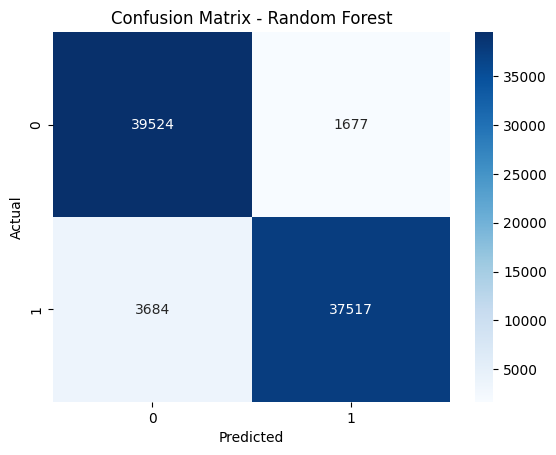

In [125]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

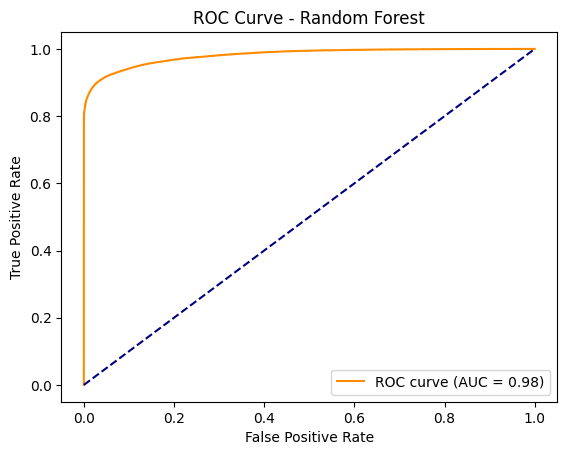

In [126]:
#roc Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [127]:
feature_importance = final_rf.feature_importances_

#Create DataFrame (twill match 10 selected features in X_train)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

#Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


          Feature  Importance
5        HighChol    0.155031
3          HighBP    0.147454
1         GenHlth    0.126106
0             Age    0.113441
2             Sex    0.082355
8          Smoker    0.071982
4        DiffWalk    0.063553
6          Stroke    0.042994
16            BMI    0.029473
12         Fruits    0.028881
11   PhysActivity    0.028135
14         Income    0.028015
17      Education    0.024696
13        Veggies    0.020628
15       PhysHlth    0.020177
9        Diabetes    0.010715
10  AnyHealthcare    0.004263
7       CholCheck    0.002101


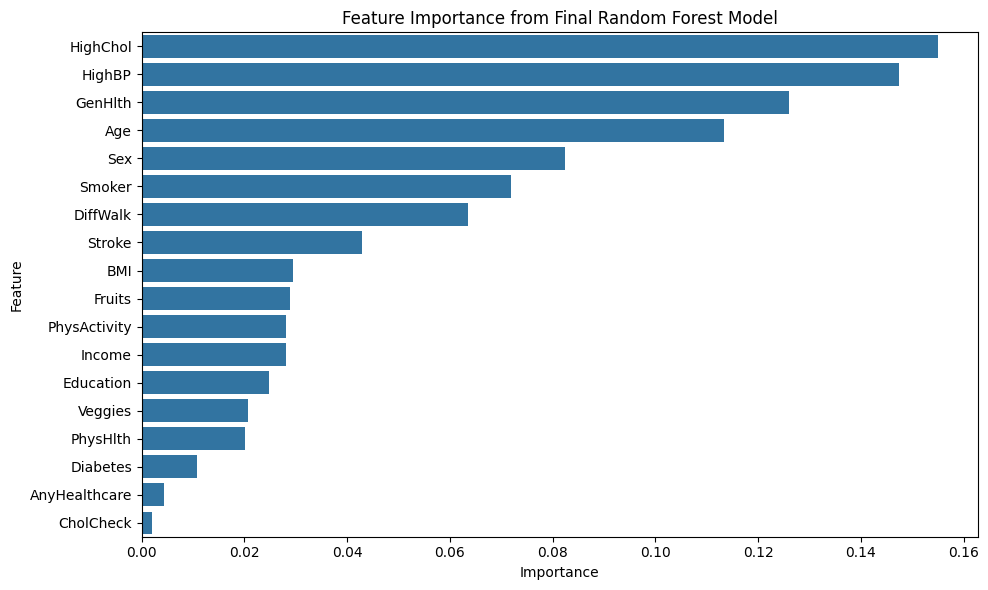

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Final Random Forest Model')
plt.tight_layout()
plt.show()

In [129]:

y_pred = final_rf.predict(X_test)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results_df.to_csv("rf_predictions.csv", index=False)

In [130]:
from sklearn.ensemble import VotingClassifier

#Best XGBoost model
xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)
#Best Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

#Voting classifier
ensemble = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('rf', rf)
], voting='soft')


ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:24:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [131]:
print(type(f1_score))

<class 'function'>


In [132]:
# Evaluation
from sklearn.metrics import f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9358268003203806
Precision: 0.9660999351070734
Recall: 0.9033518603917381
F1 Score: 0.9336728294408349

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     41201
         1.0       0.97      0.90      0.93     41201

    accuracy                           0.94     82402
   macro avg       0.94      0.94      0.94     82402
weighted avg       0.94      0.94      0.94     82402



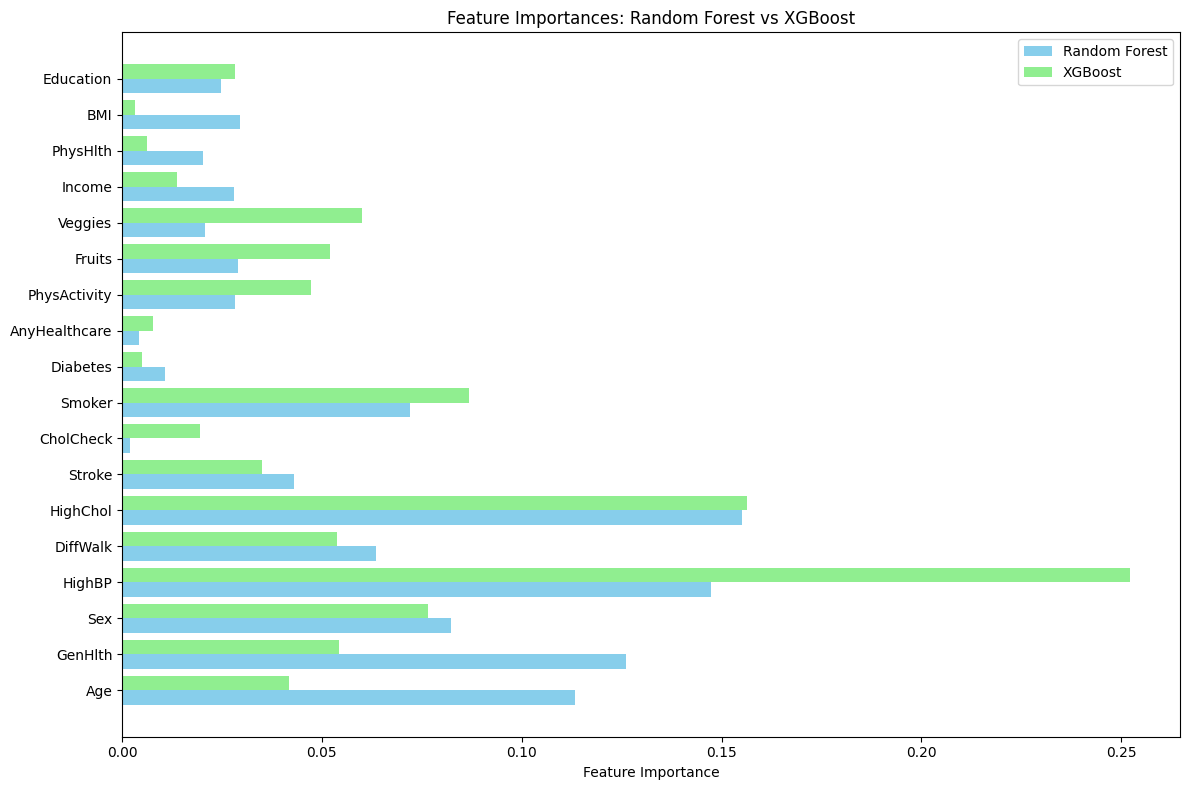

In [133]:
#Get trained ensmble modl
rf_trained = ensemble.named_estimators_['rf']
xgb_trained = ensemble.named_estimators_['xgb']

#Get importance feature
rf_importance = rf_trained.feature_importances_
xgb_importance = xgb_trained.feature_importances_

features = X_train.columns

plt.figure(figsize=(12, 8))
bar_width = 0.4
indices = np.arange(len(features))

#RF importances
plt.barh(indices, rf_importance, bar_width, label='Random Forest', color='skyblue')

#Plot XGB importances
plt.barh(indices + bar_width, xgb_importance, bar_width, label='XGBoost', color='lightgreen')

plt.yticks(indices + bar_width / 2, features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances: Random Forest vs XGBoost')
plt.legend()
plt.tight_layout()
plt.show()


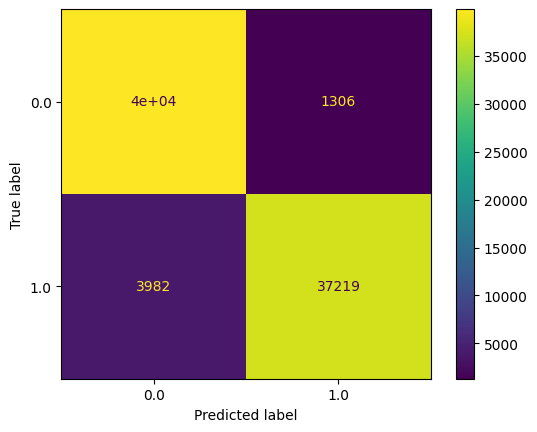

In [134]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(ensemble, X_test, y_test)

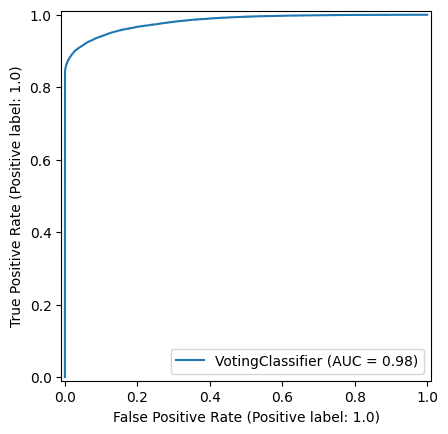

In [135]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(ensemble, X_test, y_test)